# Featuring Engeneering y Modelado

## Analisis de dataframes

In [1]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from scipy.stats import entropy


In [2]:

# Definir rutas de los datasets limpios
train_path = Path("../data/df_clean.feather")  # Ruta del dataset de entrenamiento
test_path = Path("../data/test_set_clean.feather")  # Ruta del dataset de test

# Cargar datasets
if train_path.exists() and test_path.exists():
    df_train = pd.read_feather(train_path)
    df_test = pd.read_feather(test_path)
    print("Datasets cargados correctamente.")
else:
    raise FileNotFoundError("❌ No se encontró uno o ambos archivos de datasets.")

# Función para mostrar información clave de los datasets
def analyze_datasets(df_train, df_test):
    print("\n📌 Dimensiones de los datasets:")
    print(f"Train: {df_train.shape}, Test: {df_test.shape}")

    print("\n📌 Columnas en cada dataset:")
    print(f"Train Columns: {df_train.columns.tolist()}")
    print(f"Test Columns: {df_test.columns.tolist()}")

    print("\n📌 Tipos de datos en Train:")
    print(df_train.dtypes)

    print("\n📌 Tipos de datos en Test:")
    print(df_test.dtypes)

    print("\n📌 Valores nulos en Train:")
    print(df_train.isnull().sum())

    print("\n📌 Valores nulos en Test:")
    print(df_test.isnull().sum())

    print("\n📌 Valores únicos en columnas clave (Train):")
    for col in df_train.select_dtypes(include=["object", "category"]).columns:
        print(f"{col}: {df_train[col].unique()}")

    print("\n📌 Valores únicos en columnas clave (Test):")
    for col in df_test.select_dtypes(include=["object", "category"]).columns:
        print(f"{col}: {df_test[col].unique()}")

# Ejecutar análisis comparativo
analyze_datasets(df_train, df_test)


Datasets cargados correctamente.

📌 Dimensiones de los datasets:
Train: (652515, 18), Test: (533159, 12)

📌 Columnas en cada dataset:
Train Columns: ['trip_id', 'duration', 'start_time', 'end_time', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type', 'start_station', 'end_station', 'hour', 'day_of_week', 'year_month', 'year']
Test Columns: ['trip_id', 'duration', 'start_time', 'end_time', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'bike_id', 'trip_route_category', 'start_station', 'end_station']

📌 Tipos de datos en Train:
trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_lat                     float64
start_lon                     float64
end_lat                       float64
end_lon                       float64
bike_id                        object
plan_duration                   int32
trip_route_category 

### **nálisis de los Resultados**
Tras comparar ambos datasets (`df_train` y `df_test`), podemos observar las siguientes diferencias clave:

#### **Diferencias en columnas**
- **Train tiene 18 columnas**, mientras que **Test tiene solo 12**.
- **Columnas que están en `train`, pero NO en `test`:**
  - `plan_duration`
  - `passholder_type` (Variable Objetivo)
  - `hour`
  - `day_of_week`
  - `year_month`
  - `year`
  
Esto indica que en el `Feature Engineering`, si queremos usar el mismo modelo, tendremos que generar estas características en `test`.

---

#### **Diferencias en tipos de datos**
- En `train`, `trip_route_category`, `passholder_type`, `start_station`, y `end_station` son **categóricos** (`category`).
- En `test`, `trip_route_category`, `start_station`, y `end_station` son **tipo `object` o `int64`**.
- **Corrección necesaria:** Convertir `trip_route_category`, `start_station` y `end_station` en `test` a `category` para hacerlos consistentes.

---

#### **Diferencias en los valores únicos de algunas columnas**
- **Categorías en `trip_route_category` son consistentes** entre `train` y `test`.
- **Categorías en `passholder_type` NO están en `test` (porque es la variable objetivo).**
- **Número de estaciones distintas en `train` y `test` es similar, pero hay pequeñas diferencias.**
  - `train` tiene **364 estaciones de inicio y 369 de final**.
  - `test` tiene **363 estaciones de inicio y 368 de final**.
---


In [3]:
display(df_train.head())
display(df_test.head())

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station,hour,day_of_week,year_month,year
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1,Round Trip,Walk-up,4127,4127,11,Tuesday,2018-08,2018
1,46560345,32,2017-09-17 17:51:00,2017-09-17 18:23:00,34.035679,-118.270813,34.047749,-118.243172,6683,0,One Way,Walk-up,3057,3062,17,Sunday,2017-09,2017
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30,One Way,Monthly Pass,3022,3062,9,Monday,2019-04,2019
3,129547190,138,2019-09-22 11:27:00,2019-09-22 13:45:00,34.062580,-118.290092,34.059689,-118.294662,17068,1,One Way,One Day Pass,4304,4311,11,Sunday,2019-09,2019
4,136619463,14,2020-01-31 17:11:00,2020-01-31 17:25:00,34.026291,-118.277687,34.021660,-118.278687,18841,30,One Way,Monthly Pass,4266,4443,17,Friday,2020-01,2020


,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,start_station,end_station
0,17059130,12,2017-01-01 00:24:00,2017-01-01 00:36:00,34.058319,-118.246094,34.058319,-118.246094,6351,Round Trip,3028,3028
1,17059129,17,2017-01-01 00:28:00,2017-01-01 00:45:00,34.049980,-118.247162,34.043732,-118.260139,5836,One Way,3027,3018
2,17059126,20,2017-01-01 00:39:00,2017-01-01 00:59:00,34.063389,-118.236160,34.044159,-118.251579,6529,One Way,3066,3055
3,17059125,12,2017-01-01 00:43:00,2017-01-01 00:55:00,34.048851,-118.246422,34.050140,-118.233238,6029,One Way,3029,3079
4,17061379,48,2017-01-01 00:56:00,2017-01-01 01:44:00,34.049198,-118.252831,34.049198,-118.252831,6680,Round Trip,3063,3063


Hay columnas que debo quitar o agregar, como `bike_id` que no veo relevancia, haré un analisis previo antes de borrarla, por otro lado, la columna `plan_duration` no esta en el df_test, pero es muy importante para predecir, sí llego a determinar que la columna es necesaria, vere como agregarla, aunque también preveo que es una correlación muy directa para determinar el tipo de cliente que sería casi 1 a 1, por lo que si quiero crear un modelo generalista tendría que hacer que plan duration fuera categórico y buscar aplicar una tecnica de logatimos para reducir el impacto, ya vere más adelante que hacer.

In [4]:
import pandas as pd


# Contar la frecuencia de cada tipo de pase por 'bike_id'
bike_passholder_counts = df_train.groupby(['bike_id', 'passholder_type']).size().unstack(fill_value=0)

# Calcular la entropía para cada 'bike_id' (variabilidad en los tipos de pase)
bike_passholder_counts['entropy'] = bike_passholder_counts.apply(lambda x: entropy(x, base=2), axis=1)

# Resumen del análisis
print("\n📊 Resumen de la distribución de tipos de pase por bicicleta:")
display(bike_passholder_counts.describe())

# Mostrar algunos ejemplos de bike_id con baja y alta entropía
print("\n🔍 Ejemplo de bicicletas con BAJA entropía (muy asociadas a un solo pase):")
display(bike_passholder_counts.nsmallest(10, 'entropy'))

print("\n🔍 Ejemplo de bicicletas con ALTA entropía (usadas para muchos pases distintos):")
display(bike_passholder_counts.nlargest(10, 'entropy'))


C:\Users\candy\AppData\Local\Temp\ipykernel_37352\1459972936.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_passholder_counts = df_train.groupby(['bike_id', 'passholder_type']).size().unstack(fill_value=0)



📊 Resumen de la distribución de tipos de pase por bicicleta:


passholder_type,Annual Pass,Flex Pass,Monthly Pass,One Day Pass,Testing,Walk-up,entropy
count,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,7.576127,2.492410,85.637994,9.052208,0.009890,45.303818,1.380798
std,10.803234,3.544023,95.981914,9.694377,0.105709,38.480238,0.306753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,2.000000,0.000000,18.000000,1.252515
50%,4.000000,0.000000,62.000000,6.000000,0.000000,36.500000,1.431692
75%,10.000000,4.000000,120.000000,12.000000,0.000000,63.000000,1.583566
max,128.000000,21.000000,962.000000,82.000000,2.000000,272.000000,2.047975



🔍 Ejemplo de bicicletas con BAJA entropía (muy asociadas a un solo pase):


passholder_type,Annual Pass,Flex Pass,Monthly Pass,One Day Pass,Testing,Walk-up,entropy
bike_id,,,,,,,
06125,0,1,0,0,0,0,0.0
06495,0,0,0,0,0,1,0.0
11319,0,0,1,0,0,0,0.0
13700,0,0,1,0,0,0,0.0
13764,1,0,0,0,0,0,0.0
13987,0,0,0,2,0,0,0.0
15090,0,0,1,0,0,0,0.0
15096,0,0,1,0,0,0,0.0
15110,0,0,14,0,0,0,0.0



🔍 Ejemplo de bicicletas con ALTA entropía (usadas para muchos pases distintos):


passholder_type,Annual Pass,Flex Pass,Monthly Pass,One Day Pass,Testing,Walk-up,entropy
bike_id,,,,,,,
16050,6,0,9,4,1,11,2.047975
15534,14,0,19,11,1,22,2.033629
15923,3,1,12,11,1,21,1.980692
13696,6,0,8,4,0,5,1.953153
15336,2,0,4,3,0,4,1.950064
15604,6,0,8,6,0,12,1.936278
16154,7,0,16,15,0,16,1.935353
16014,9,0,9,4,0,9,1.935229
13525,4,0,6,3,0,7,1.926121


### **Análisis de la Relación entre `bike_id` y `passholder_type`**

#### **Resumen de los Resultados**
- Hay **4,348 bicicletas únicas** en el dataset.
- En promedio, cada bicicleta se asocia con múltiples tipos de pase, pero con una fuerte inclinación hacia `Monthly Pass` y `Walk-up`:
  - **`Monthly Pass`** tiene el mayor promedio de viajes por bicicleta (**85.63 viajes por bici**).
  - **`Walk-up`** también es significativo (**45.3 viajes por bici**), aunque con mayor dispersión.
- La **entropía promedio** es **1.38**, lo que indica **variabilidad moderada** en el uso de bicicletas para diferentes pases.
- La **entropía mínima es 0**, lo que significa que algunas bicicletas están **completamente asociadas** con un solo tipo de pase.
- La **entropía máxima es 2.04**, lo que sugiere que algunas bicicletas son usadas por casi todos los tipos de pase en proporciones similares.

Por lo que : 

1. **Bicicletas con Baja Entropía (muy asociadas a un solo pase)**
   - Ejemplo: `bike_id = 06125` solo fue usada para `Flex Pass`.
   - Estas bicicletas **podrían ser predictivas** del tipo de pase si muchas comparten este patrón.

2. **Bicicletas con Alta Entropía (usadas para muchos pases)**
   - Ejemplo: `bike_id = 16050` tiene un uso equilibrado entre `Annual Pass`, `Monthly Pass`, `One Day Pass`, `Testing` y `Walk-up`.
   - Estas bicicletas **no son un buen predictor** del tipo de pase porque no tienen una relación clara con uno solo.


- **Conclusión**: `bike_id` **NO es una variable clave** para predecir `passholder_type` porque:
  - Aunque algunas bicicletas están ligadas a un solo pase, la mayoría tienen alta entropía.
  - Muchas bicicletas son usadas indistintamente por varios tipos de pase.
  - **Si lo dejamos como feature, puede agregar ruido y reducir el rendimiento del modelo.**





## Desicion importante

Me encantaría hacer la prueba ``con`` y ``sin`` ``plan_duration`` y ver los resultados, tomaré la desiciónd de agregarlos buscando tener un buen test, lo inferiré de las otras columnas `trip_route_category` y `duration`. Inlcuso se podría hacer un modelo df que prediga esa característica. Pero por cuestion de tiempo para esta prueba lo haré con.

C:\Users\candy\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


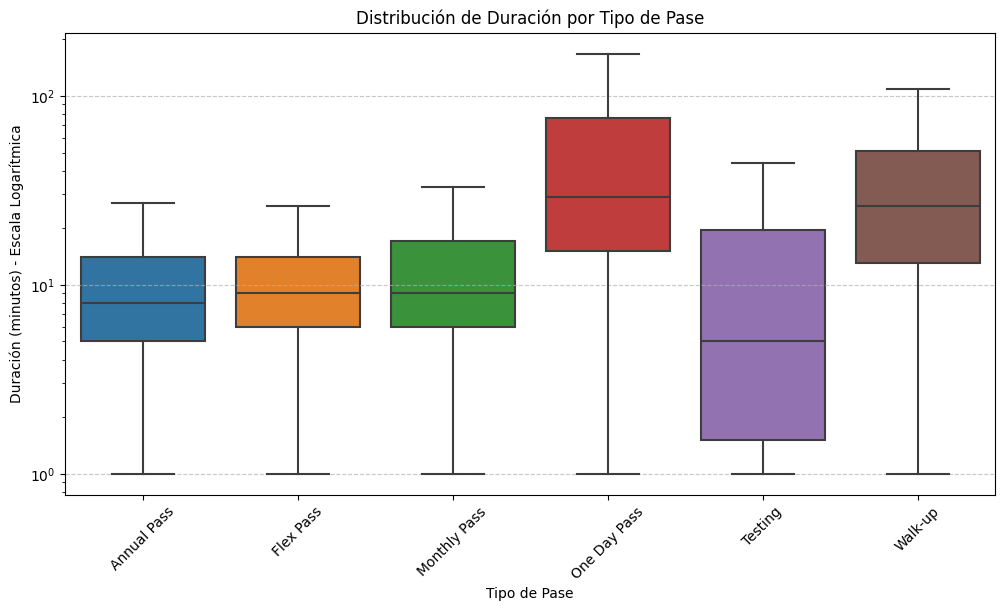

C:\Users\candy\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


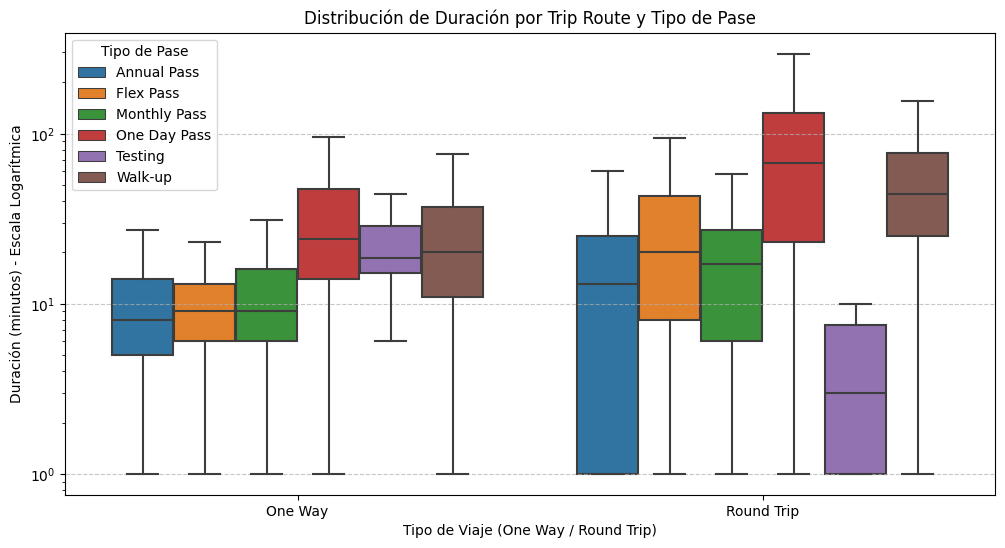

C:\Users\candy\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\candy\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\candy\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\candy\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

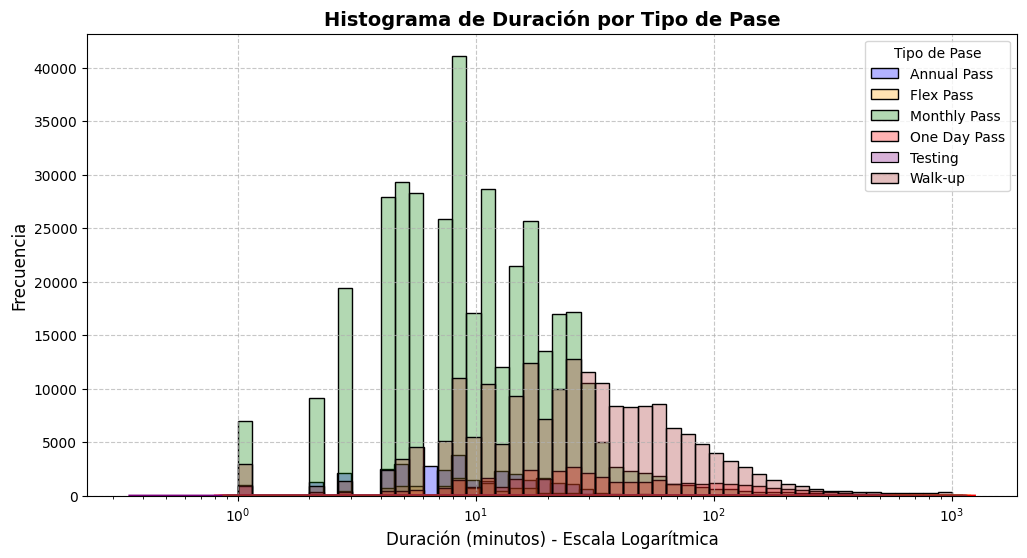

In [5]:
def analyze_duration_vs_passholder(df_train):
    """
    Genera gráficos para analizar la relación entre 'duration', 'trip_route_category'
    y 'passholder_type' en el dataset de entrenamiento.
    """

    plt.figure(figsize=(12, 6))
    sns.boxplot(x="passholder_type", y="duration", data=df_train, showfliers=False)
    plt.xticks(rotation=45)
    plt.yscale("log")  # Escala logarítmica para mejor visualización
    plt.title("Distribución de Duración por Tipo de Pase")
    plt.xlabel("Tipo de Pase")
    plt.ylabel("Duración (minutos) - Escala Logarítmica")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x="trip_route_category", y="duration", hue="passholder_type", data=df_train, showfliers=False)
    plt.yscale("log")
    plt.title("Distribución de Duración por Trip Route y Tipo de Pase")
    plt.xlabel("Tipo de Viaje (One Way / Round Trip)")
    plt.ylabel("Duración (minutos) - Escala Logarítmica")
    plt.legend(title="Tipo de Pase")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


def plot_duration_distribution(df):
    """
    Gráfica de histograma y KDE de duración de viaje por tipo de pase.
    Se usa escala logarítmica para visualizar mejor la distribución.
    """
    plt.figure(figsize=(12, 6))
    
    # Definir colores por tipo de pase
    colors = {
        "Annual Pass": "blue",
        "Flex Pass": "orange",
        "Monthly Pass": "green",
        "One Day Pass": "red",
        "Testing": "purple",
        "Walk-up": "brown"
    }
    
    # Filtrar valores atípicos extremos (opcional)
    df_filtered = df[df["duration"] <= 1000]  # Filtrar valores mayores a 1000 minutos
    
    # Graficar histograma y KDE para cada tipo de pase
    for pass_type, color in colors.items():
        subset = df_filtered[df_filtered["passholder_type"] == pass_type]
        if not subset.empty:
            sns.histplot(subset["duration"], bins=50, color=color, label=pass_type, alpha=0.3, log_scale=True)
            sns.kdeplot(subset["duration"], color=color, bw_adjust=0.5)

    # Mejoras en la visualización
    plt.xlabel("Duración (minutos) - Escala Logarítmica", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.title("Histograma de Duración por Tipo de Pase", fontsize=14, fontweight="bold")
    plt.legend(title="Tipo de Pase")  # Agregar leyenda
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.show()



# Ejecutar análisis en df_train
analyze_duration_vs_passholder(df_train)
plot_duration_distribution(df_train)


Explicación de los gráficos
- 10⁰ = 1 minuto
- 10¹ = 10 minutos
- 10² = 100 minutos (1 hora y 40 minutos)
- 10³ = 1000 minutos (~16.6 horas)
 ¿Por qué usar escala logarítmica?

Los datos de duration tienen una distribución sesgada (valores muy pequeños y algunos extremadamente grandes). Con una escala lineal, las diferencias entre los valores bajos se perderían porque los valores altos dominarían la visualización. La escala logarítmica ayuda a distinguir mejor los patrones y diferencias entre categorías.



**Lo observado en la distribución de duración por tipo de pase:**
1. **Patrón claro en `Monthly Pass` y `Walk-up`:**
   - La mayoría de los viajes **de corta duración (entre 5 y 20 minutos)** están dominados por **Monthly Pass (verde)** y **Walk-up (marrón)**.
   - Esto tiene sentido porque los usuarios con un pase mensual suelen hacer viajes más cortos y frecuentes.
   - Los usuarios Walk-up (pago por uso) también suelen usar la bicicleta por poco tiempo.

2. **`One Day Pass` y `Testing` tienen una distribución más dispersa**:
   - `One Day Pass` (rojo) muestra una mayor variabilidad en duración, lo cual es lógico ya que este pase permite **viajes más largos en un solo día**.
   - `Testing` (morado) parece estar presente en varios rangos, lo que indica que no sigue un patrón definido.

3. **Los pases anuales (`Annual Pass`) tienen una tendencia similar a los pases mensuales**:
   - `Annual Pass` (azul) también se concentra en los viajes cortos, lo que sugiere que estos usuarios usan las bicicletas con frecuencia pero en viajes rápidos.

4. **Duraciones extremas (cercanas a 1000 minutos) son casos raros**:
   - Puede haber errores en los datos o simplemente ser usuarios que dejaron la bicicleta sin devolver por varias horas.


`duration` es una variable altamente relevante para predecir passholder_type.
Esto respalda la hipótesis de que podemos inferir plan_duration a partir de duration en df_test. Pero dado el analisis lo que haré será eliminar `plan_duration` del train porque podría ser una redundancia,`plan_duration` es solo una versión predefinida de `duration` con ciertos cortes (0, 1, 30, 365 días) además como `duration` es un valor continuo, el modelo podrá aprender mejor las diferencias entre tipos de pase sin necesitar `plan_duration`.  





## Procesamiento de características

 Eliminaremos **`bike_id`** y **`plan_duration`** de `df_train`, y convertiremos **`day_of_week`** y **`year_month`** a categoría. En `df_test`, extraeremos **`hour`**, **`day_of_week`**, **`year_month`** y **`year`** desde `start_time`, eliminaremos **`bike_id`**, y convertiremos **`trip_route_category`** a categoría. Además, **`start_station` y `end_station` serán convertidos a `category` en `df_test`** para mantener consistencia con `df_train`. Esto garantiza que ambos datasets tengan las mismas columnas y tipos de datos optimizados para los modelos como LightGBM.  




In [6]:
def preprocess_datasets(df_train, df_test):
    """ Preprocesa ambos datasets para garantizar consistencia y optimización para LightGBM. """

    # Eliminar columnas irrelevantes en df_train y df_test
    df_train = df_train.drop(columns=["bike_id", "plan_duration"])
    df_test = df_test.drop(columns=["bike_id"])

    # Extraer columnas temporales en df_test
    df_test["hour"] = df_test["start_time"].dt.hour.astype("int32")
    df_test["day_of_week"] = df_test["start_time"].dt.day_name().astype("category")
    df_test["year_month"] = df_test["start_time"].dt.to_period("M").astype("category")
    df_test["year"] = df_test["start_time"].dt.year.astype("int32")

    # Convertir columnas categóricas en df_train y df_test
    df_train["day_of_week"] = df_train["day_of_week"].astype("category")
    df_train["year_month"] = df_train["year_month"].astype("category")
    df_train["trip_route_category"] = df_train["trip_route_category"].astype("category")
    df_test["trip_route_category"] = df_test["trip_route_category"].astype("category")

    # Convertir start_station y end_station a categoría en df_test para mantener consistencia con df_train
    df_test["start_station"] = df_test["start_station"].astype("category")
    df_test["end_station"] = df_test["end_station"].astype("category")

    return df_train, df_test

# Ejecutar preprocesamiento
df_train, df_test = preprocess_datasets(df_train, df_test)

print(" Preprocesamiento completado. Ambos datasets están listos para el modelo.")


 Preprocesamiento completado. Ambos datasets están listos para el modelo.


In [7]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 652515 entries, 0 to 699999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              652515 non-null  int64         
 1   duration             652515 non-null  int64         
 2   start_time           652515 non-null  datetime64[ns]
 3   end_time             652515 non-null  datetime64[ns]
 4   start_lat            652515 non-null  float64       
 5   start_lon            652515 non-null  float64       
 6   end_lat              652515 non-null  float64       
 7   end_lon              652515 non-null  float64       
 8   trip_route_category  652515 non-null  category      
 9   passholder_type      652515 non-null  category      
 10  start_station        652515 non-null  category      
 11  end_station          652515 non-null  category      
 12  hour                 652515 non-null  int32         
 13  day_of_week        

None

<class 'pandas.core.frame.DataFrame'>
Index: 533159 entries, 0 to 569885
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              533159 non-null  int64         
 1   duration             533159 non-null  int64         
 2   start_time           533159 non-null  datetime64[ns]
 3   end_time             533159 non-null  datetime64[ns]
 4   start_lat            533159 non-null  float64       
 5   start_lon            533159 non-null  float64       
 6   end_lat              533159 non-null  float64       
 7   end_lon              533159 non-null  float64       
 8   trip_route_category  533159 non-null  category      
 9   start_station        533159 non-null  category      
 10  end_station          533159 non-null  category      
 11  hour                 533159 non-null  int32         
 12  day_of_week          533159 non-null  category      
 13  year_month         

None

Para los modelos clasificación no es muy adecuado trabajar con fechas por lo que será bueno borralas

In [8]:
# Eliminar columnas de fecha y hora en ambos datasets
df_train = df_train.drop(columns=["start_time", "end_time"])
df_test = df_test.drop(columns=["start_time", "end_time"])

In [10]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 652515 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   trip_id              652515 non-null  int64   
 1   duration             652515 non-null  int64   
 2   start_lat            652515 non-null  float64 
 3   start_lon            652515 non-null  float64 
 4   end_lat              652515 non-null  float64 
 5   end_lon              652515 non-null  float64 
 6   trip_route_category  652515 non-null  category
 7   passholder_type      652515 non-null  category
 8   start_station        652515 non-null  category
 9   end_station          652515 non-null  category
 10  hour                 652515 non-null  int32   
 11  day_of_week          652515 non-null  category
 12  year_month           652515 non-null  category
 13  year                 652515 non-null  int32   
dtypes: category(6), float64(4), int32(2), int64(2)
memory usa

None

<class 'pandas.core.frame.DataFrame'>
Index: 533159 entries, 0 to 569885
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   trip_id              533159 non-null  int64   
 1   duration             533159 non-null  int64   
 2   start_lat            533159 non-null  float64 
 3   start_lon            533159 non-null  float64 
 4   end_lat              533159 non-null  float64 
 5   end_lon              533159 non-null  float64 
 6   trip_route_category  533159 non-null  category
 7   start_station        533159 non-null  category
 8   end_station          533159 non-null  category
 9   hour                 533159 non-null  int32   
 10  day_of_week          533159 non-null  category
 11  year_month           533159 non-null  category
 12  year                 533159 non-null  int32   
dtypes: category(5), float64(4), int32(2), int64(2)
memory usage: 36.1 MB


None

In [15]:
# Definir rutas de guardado
output_dir = "../data/"  #  de que esta carpeta exista
train_feather_path = os.path.join(output_dir, "df_train_processed.feather")
test_feather_path = os.path.join(output_dir, "df_test_processed.feather")
